#### Ahmed Mohamed | Ahmed.H.H.Muhamed@gmail.com

# Assignment 4

## Exercise 1 (Connected Components, 8 Points)

Define a function that takes the grid file path and return the grid as nested list of binary integers 

In [1]:
# Import Library
import copy

def get_grid(grid_path):
    '''Define a function that take the grid file path and return the grid as a string'''

    with open (grid_path, "r") as file: # Read the Binary grid file as a string
        global grid
        grid = file.read()

        lines_splitted = grid.split('\n') # split each line into a list

        grid_list_string = [] # Create the nested list
        for i in lines_splitted:
            grid_list_string.append(i.split(' '))

        grid_ints = [[int(i) for i in grid_list_string[r]] for r in range(len(grid_list_string))]


    return grid_ints

Create a function that takes the binary grid on the left as input, finds the set of connected components,
and outputs the grid on the right where every cell has a number indicating the label it belongs to.

In [2]:
def connected_points(grid_ints):

    # Define the Connected Points Function

    conflect_point = [] # This List will store the conflict points between the cells.
    color_ind = 1   # colores are represented by color indication. the Initial Color indicator is 1

    for r in range(len(grid_ints)):
        
        ''' This For loop will be used to loop over each element in the grid integers
        and assign the color label according to the algorithm explained below'''
        
        for c in range(len(grid_ints[r])):
            
            ''' The Algorithm: explained at each step'''

            if r == 0 and c == 0:
                # the first element will be labeled by the initial color indicator.
                var1 = copy.copy(color_ind)
                grid_ints[r][c] = copy.copy(var1)
                color_ind += 1

            elif r == 0 and c != 0: # separated algorithm for the 1st row as there is no above elements

                if grid_ints[r][c] == 1 and grid_ints[r][c-1] != 0:
                    '''if the element is connected on the row scale (the previous element not equal 0),
                            label it with the same color indicator as the previous element.'''
                    var1 = copy.copy(grid_ints[r][c-1])
                    grid_ints[r][c] = copy.copy(var1)

                elif grid_ints[r][c] == 1 and grid_ints[r][c-1] == 0:
                    '''if element is not connected, label it with a new indicator (incremented by 1)'''
                    var1 = copy.copy(color_ind)
                    grid_ints[r][c] = copy.copy(var1)
                    color_ind += 1

                elif grid_ints[r][c] == 0:
                    '''if element = zero, pass.'''
                    pass

            elif r != 0 and c == 0: # Separated Algorithm for 1st column as there are No previous elements.
                
                if grid_ints[r][c] == 1 and grid_ints[r-1][c] == 0:
                    '''if element is not connected, label it with a new indicator (incremented by 1)'''
                    var1 = copy.copy(color_ind)
                    grid_ints[r][c] = copy.copy(var1)
                    color_ind += 1

                elif grid_ints[r][c] == 1 and grid_ints[r-1][c] != 0:
                    '''if the element is connected on the column scale (the element above not equal 0),
                            Label it with the same color indicator as the element above.'''
                    var1 = copy.copy(grid_ints[r-1][c])
                    grid_ints[r][c] = copy.copy(var1)

                else:
                    pass
            else: # seperated algorithm for the rest of elements - rows > 0 and columns > 0.

                if grid_ints[r][c] == 1 and grid_ints[r][c-1] != 0 and grid_ints[r-1][c] == 0:
                    '''if the element is connected on the row scale (the previous element not equal 0),
                            label it with the same color indicator as the previous element.'''
                    var1 = copy.copy(grid_ints[r][c-1])
                    grid_ints[r][c] = copy.copy(var1)

                elif grid_ints[r][c] == 1 and grid_ints[r-1][c] != 0 and grid_ints[r][c-1] == 0:
                    '''if the element is connected on the column scale (the element above not equal 0),
                            Label it with the same color indicator as the element above.'''
                    var1 = copy.copy(grid_ints[r-1][c])
                    grid_ints[r][c] = copy.copy(var1)

                elif grid_ints[r][c] == 1 and grid_ints[r-1][c] != 0 and grid_ints[r][c-1] != 0:
                    '''if the element is connected on both row and column scales,
                            Label it with the same color indicator as the previous element(on the row scale)'''
                    var1 = copy.copy(grid_ints[r][c-1])
                    grid_ints[r][c] = copy.copy(var1)

                    '''add a conflect point to remember that the color indicators on the row and column scales
                            should be adjusted to one color indicator as the elements are connected.'''
                    if grid_ints[r][c] != grid_ints[r-1][c]: 
                        conflect_point.append([grid_ints[r][c],grid_ints[r-1][c]])

                elif grid_ints[r][c] == 1 and grid_ints[r-1][c] == 0 and grid_ints[r][c-1] == 0:
                    '''if element is not connected, label it with a new indicator (incremented by 1)'''
                    var1 = copy.copy(color_ind)
                    grid_ints[r][c] = copy.copy(var1)
                    color_ind += 1

                elif grid_ints[r][c] == 0:
                    '''if element = zero, pass.'''
                    pass

    ''' Use For Loop to label the conflict points with the same color indicator'''
    for cp in conflect_point:
        # Loop on each conflict point
        for r in range(len(grid_ints)):
            for c in range(len(grid_ints)):
                # Nested loop to loop through each element and label it with the same color indicator if its value is one of the values of the cp.
                if grid_ints[r][c] == copy.copy(cp[1]):
                    grid_ints[r][c] = copy.copy(cp[0])

    '''Convert grid list to grid string like the binary grid string.'''
    grid_out=[]

    for i in grid_ints:
        grid_out.append(''.join(str(i)).replace(',','').replace('[','').replace(']','') + '\n')

    grid_out_string = ''.join(grid_out)
    
    return grid_out_string

Testing the Function

In [3]:
grid_path = r'C:\Users\Ahmed Hossam\Documents\Life Science Informatics Documents\LSI Material\Winter Semester 23-24\CS for LSI Students\Exercises\Assignment 4\binary-grid.txt'
grid_integers = get_grid(grid_path)

print('The Binary Grid: \n')
print(grid)
print('-' * 50)
print('The colored Grid: \n')
print(connected_points(grid_integers))

The Binary Grid: 

1 1 0 1 1 1 0 1
1 1 0 1 0 1 0 1
1 1 1 1 0 0 0 1
0 0 0 0 0 0 0 1
1 1 1 1 0 1 0 1
0 0 0 1 0 1 0 1
1 1 1 1 0 0 0 1
1 1 1 1 0 1 1 1
--------------------------------------------------
The colored Grid: 

1 1 0 1 1 1 0 7
1 1 0 1 0 1 0 7
1 1 1 1 0 0 0 7
0 0 0 0 0 0 0 7
6 6 6 6 0 5 0 7
0 0 0 6 0 5 0 7
6 6 6 6 0 0 0 7
6 6 6 6 0 7 7 7



## Exercise 2 (Time complexity of linear vs. binary search, 8 Points)

Defining Binary Search function

In [4]:
def binary_search(sortedlist, value):
    ''' Define a function that takes a sorted list and a value and search for this value in the list using binary search'''
    
    interval_start_ind = 0      # Initial starting index
    interval_end_ind = len(sortedlist)      # initial ending index
    
    found_flag = False      # existing state flag

    while found_flag == False:

        ''' While the item is not found, search for it within the new indexes range'''

        search_index = int(round((interval_end_ind + interval_start_ind) / 2, 0))       # New Search_index = the average of the new start and end indexes

        if len(sortedlist[interval_start_ind:interval_end_ind]) > 1:    # if there are more than one item in the range . . .
            
            if sortedlist[search_index] == value:   # if the item is found, break the loop and label the flag True.
                found_flag = True
            elif sortedlist[search_index] > value:  # if not found and the item of the searching index is bigger than the value, label the new ending index to this item's index.
                interval_end_ind = search_index
            else:
                interval_start_ind = search_index   # if not found and the item of the searching index is smaller than the value, label the new starting index to this item's index.
        
        elif len(sortedlist[interval_start_ind:interval_end_ind]) == 1:     # if there is only one item in the range, check if this item is the one we are searching for
            if sortedlist[search_index] == value:
                found_flag = True
            else:   # the last item is not the one we are searching for, break the loop as the item doesn't exists.
                break
        else:   # Definsive programming
            break

    # return the state, True or False.        
    return found_flag 

Generate lists of random integers with varying lengths (e.g., 100, 1000, 10000, 100000 elements).
Measure the time it takes to sort these lists using the sorted() function and the time it takes to search for an item using In operator and Binary Search, then Plot the execution times against the length of the lists.

In [5]:
from random import randint
from time import time

import matplotlib.pylab as plt


Ex_sorting_TT_dict = {}     # define a dictionary to store the execution time of sorting elements of different lists
Ex_in_searching_TT_dict = {}   # define a dictionary to store the execution time of searching for an element within different lists
Ex_binary_search_searching_TT_dict = {}   # define a dictionary to store the execution time of searching for an element within different lists

elements_no = 1000

for i in range(5):
    # Generate the list
    list_unsorted = []
    for el in range(elements_no):
        rand_no = randint(1,elements_no)
        list_unsorted.append(rand_no)
    
    # Calculate the excution time of sorting
    start_time1 = time()
    list_sorted = sorted(list_unsorted)
    end_time1 = time()
    
    time_diff1 = (end_time1 - start_time1) * 1000

    # excution time to search for a random integer in the list (Using In Operator)
    found_bool = False
    rand_no2 = randint(1,elements_no)
    start_time2 = time()
    if rand_no2 in list_sorted:
        found_bool = True
    end_time2 = time()

    time_diff2 = (end_time2 - start_time2) * 1000

    # excution time to search for a random integer in the list (Using Binary Search)
    start_time3 = time()
    found_bool = binary_search(list_sorted, rand_no2)
    end_time3 = time()

    time_diff3 = (end_time3 - start_time3) * 1000

    # Store the data in a dictionary ( Key = Number of Elements , Value = Excution Time)
    Ex_sorting_TT_dict[elements_no] = time_diff1
    Ex_in_searching_TT_dict[elements_no] = time_diff2
    Ex_binary_search_searching_TT_dict[elements_no] = time_diff3


    # Change number of elements
    elements_no = elements_no * 10


print(Ex_sorting_TT_dict)
print(Ex_in_searching_TT_dict)
print(Ex_binary_search_searching_TT_dict)

{1000: 1.5382766723632812, 10000: 0.9992122650146484, 100000: 15.024185180664062, 1000000: 197.61896133422852, 10000000: 2969.712257385254}
{1000: 0.0, 10000: 0.9963512420654297, 100000: 2.991914749145508, 1000000: 20.016193389892578, 10000000: 550.1842498779297}
{1000: 0.0, 10000: 0.0, 100000: 0.9973049163818359, 1000000: 49.57127571105957, 10000000: 803.3490180969238}


Define a function for plotting

In [6]:
def plot_xy(dict, title):
    # Plotting Results of a dictionary and name the chart according to title parameter.

    x_axis = []
    y_axis = []

    for x,y in dict.items():
        x_axis.append(x)
        y_axis.append(y)

    plt.title(f'Excution time to {title} integeres in a list')
    plt.scatter(x_axis,y_axis)
    plt.xlabel('Number of elements', loc= 'center')
    plt.ylabel('Excution time in miliseconds', loc= 'center')
    plt.show()

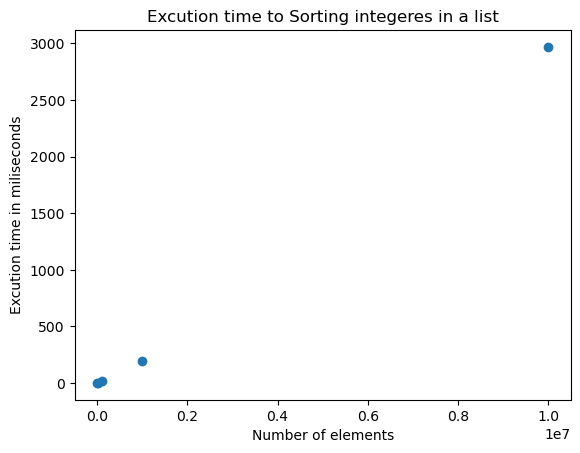

In [7]:
plot_xy(Ex_sorting_TT_dict, 'Sorting')

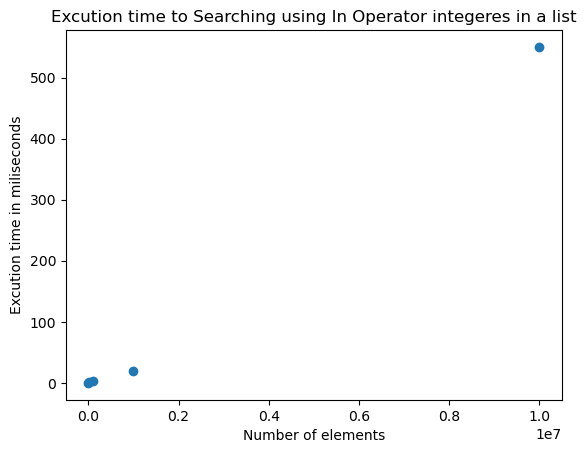

In [8]:
plot_xy(Ex_in_searching_TT_dict, 'Searching using In Operator')

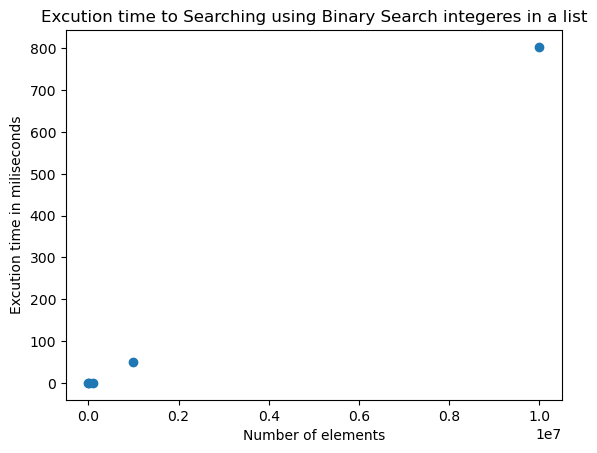

In [9]:
plot_xy(Ex_binary_search_searching_TT_dict, 'Searching using Binary Search')

## Exercise 3 (Naive Bayes Classifier, 9 Points)

TheFile iris_train.csv contains the four attributes and the class of 80 samples. Load the file's
content and process it into a suitable Python object.

In [10]:
def NB_GetData(f_path):
    with open (f_path, 'r') as file:
        Set_str = file.read()
        set_lineslist = Set_str.split('\n')

    train_set = [i.split(',') for i in set_lineslist]

    return Set_str, train_set

In [11]:
Training_path = r'C:\Users\Ahmed Hossam\Documents\Life Science Informatics Documents\LSI Material\Winter Semester 23-24\CS for LSI Students\Exercises\Assignment 4\iris_train.csv'

TrainSet_str, train_set = NB_GetData(Training_path)

print(TrainSet_str)
print(train_set)

6,2,5,2,Iris-virginica
6,3,6,2,Iris-virginica
6,3,4,1,Iris-versicolor
7,2,6,2,Iris-virginica
6,2,4,2,Iris-versicolor
6,3,4,1,Iris-versicolor
6,3,4,1,Iris-versicolor
7,3,6,2,Iris-virginica
6,3,4,1,Iris-versicolor
6,3,5,2,Iris-virginica
8,3,7,2,Iris-virginica
6,3,4,1,Iris-versicolor
6,3,4,2,Iris-versicolor
6,2,5,2,Iris-virginica
7,3,5,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,2,5,2,Iris-virginica
6,3,5,2,Iris-virginica
5,3,4,1,Iris-versicolor
6,2,5,2,Iris-versicolor
7,3,6,2,Iris-virginica
6,3,5,1,Iris-versicolor
7,3,6,2,Iris-virginica
6,3,5,2,Iris-virginica
7,3,6,2,Iris-virginica
6,3,4,2,Iris-versicolor
7,3,5,2,Iris-virginica
6,3,5,2,Iris-virginica
8,4,6,2,Iris-virginica
5,2,4,1,Iris-versicolor
6,3,6,2,Iris-virginica
6,3,4,2,Iris-versicolor
7,3,4,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,3,5,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,2,4,1,Iris-versicolor
6,3,5,2,Iris-virginica
7,3,4,1,Iris-versicolor
7,3,6,2,Ir

Compute the probabilities P(y) of the class Iris-virginica and that of the class Iris-versicolor
as the relative frequencies with which each class occurs in the training data.

In [12]:
T_data_volume = len(train_set)
Iris_virginica_freq = TrainSet_str.count('Iris-virginica')
Iris_versicolor_freq = TrainSet_str.count('Iris-versicolor')

Prob_Iris_virginica = Iris_virginica_freq / T_data_volume

Prob_Iris_versicolor = Iris_versicolor_freq / T_data_volume

print(f'Probability of Iris-virginica class is {round(Prob_Iris_virginica,3)}')
print(f'Probability of Iris-versicolor class is {round(Prob_Iris_versicolor,3)}')

Probability of Iris-virginica class is 0.425
Probability of Iris-versicolor class is 0.575


For each class, compute the probability distribution P(xi j y) of each attribute given that class.

In [13]:
def prob_dist(dataset, attribute_index, class_name):

    '''Define a function that takes a dataset, attribute column index, and class name
    as parameters and return the probability distribution of this attribute given this class'''

    x_values_InClass = [r[attribute_index] for r in dataset if class_name in r]
    all_x_values = [r[attribute_index] for r in dataset]

    x_DistinctValues = set(all_x_values)

    Prob_dist_dict_x = {}

    for v in x_DistinctValues:
        Prob_dist_dict_x[v] = (x_values_InClass.count(v) + 1) / (len(x_values_InClass) + len(x_DistinctValues))

    return Prob_dist_dict_x

In [14]:
# Calculate Probability Distribution of attributes given class 'Iris-virginica'

ProbDist_x1_Iris_virginica = prob_dist(train_set, 0, 'Iris-virginica')
ProbDist_x2_Iris_virginica = prob_dist(train_set, 1, 'Iris-virginica')
ProbDist_x3_Iris_virginica = prob_dist(train_set, 2, 'Iris-virginica')
ProbDist_x4_Iris_virginica = prob_dist(train_set, 3, 'Iris-virginica')

print(f'Iris-virginica x1 : {ProbDist_x1_Iris_virginica}')
print(f'Iris-virginica x2 : {ProbDist_x2_Iris_virginica}')
print(f'Iris-virginica x3 : {ProbDist_x3_Iris_virginica}')
print(f'Iris-virginica x4 : {ProbDist_x4_Iris_virginica}')

Iris-virginica x1 : {'8': 0.13157894736842105, '6': 0.47368421052631576, '7': 0.34210526315789475, '5': 0.05263157894736842}
Iris-virginica x2 : {'3': 0.7567567567567568, '4': 0.08108108108108109, '2': 0.16216216216216217}
Iris-virginica x3 : {'4': 0.05128205128205128, '5': 0.38461538461538464, '7': 0.07692307692307693, '3': 0.02564102564102564, '6': 0.46153846153846156}
Iris-virginica x4 : {'1': 0.027777777777777776, '2': 0.9722222222222222}


In [15]:
# Calculate Probability Distribution of attributes given class 'Iris-versicolor'

ProbDist_x1_Iris_versicolor = prob_dist(train_set, 0, 'Iris-versicolor')
ProbDist_x2_Iris_versicolor = prob_dist(train_set, 1, 'Iris-versicolor')
ProbDist_x3_Iris_versicolor = prob_dist(train_set, 2, 'Iris-versicolor')
ProbDist_x4_Iris_versicolor = prob_dist(train_set, 3, 'Iris-versicolor')

print(f'Iris-versicolor x1 : {ProbDist_x1_Iris_versicolor}')
print(f'Iris-versicolor x2 : {ProbDist_x2_Iris_versicolor}')
print(f'Iris-versicolor x3 : {ProbDist_x3_Iris_versicolor}')
print(f'Iris-versicolor x4 : {ProbDist_x4_Iris_versicolor}')

Iris-versicolor x1 : {'8': 0.02, '6': 0.7, '7': 0.18, '5': 0.1}
Iris-versicolor x2 : {'3': 0.7551020408163265, '4': 0.02040816326530612, '2': 0.22448979591836735}
Iris-versicolor x3 : {'4': 0.6274509803921569, '5': 0.29411764705882354, '7': 0.0196078431372549, '3': 0.0392156862745098, '6': 0.0196078431372549}
Iris-versicolor x4 : {'1': 0.6666666666666666, '2': 0.3333333333333333}


In [16]:
def Naive_Bayes_Classifier(x1, x2, x3, x4):

    NB_Score_Iris_virginica = Prob_Iris_virginica * ProbDist_x1_Iris_virginica[x1] * ProbDist_x2_Iris_virginica[x2] * ProbDist_x3_Iris_virginica[x3] * ProbDist_x4_Iris_virginica[x4]

    NB_Score_Iris_versicolor = Prob_Iris_versicolor * ProbDist_x1_Iris_versicolor[x1] * ProbDist_x2_Iris_versicolor[x2] * ProbDist_x3_Iris_versicolor[x3] * ProbDist_x4_Iris_versicolor[x4]

    winning_class = 'None'

    if NB_Score_Iris_virginica > NB_Score_Iris_versicolor:
        winning_class = 'Iris-virginica'
    elif NB_Score_Iris_virginica < NB_Score_Iris_versicolor:
        winning_class = 'Iris-versicolor'
    else:
        winning_class = 'Even'

    return winning_class

In [17]:
Test_path = r'C:\Users\Ahmed Hossam\Documents\Life Science Informatics Documents\LSI Material\Winter Semester 23-24\CS for LSI Students\Exercises\Assignment 4\iris_test.csv'

Test_str ,Test_set = NB_GetData(Test_path)

print(Test_str)
print(Test_set)

6,3,6,2,Iris-virginica
6,3,5,2,Iris-virginica
7,3,6,2,Iris-virginica
8,4,7,2,Iris-virginica
6,3,6,1,Iris-virginica
6,3,6,2,Iris-virginica
7,3,6,2,Iris-virginica
5,2,3,1,Iris-versicolor
6,3,6,2,Iris-virginica
6,3,5,2,Iris-virginica
6,3,5,2,Iris-virginica
7,3,5,2,Iris-virginica
6,2,4,1,Iris-versicolor
8,3,7,2,Iris-virginica
6,3,5,2,Iris-virginica
6,3,5,2,Iris-virginica
5,2,3,1,Iris-versicolor
6,3,4,1,Iris-versicolor
6,3,6,2,Iris-virginica
7,3,5,2,Iris-virginica
[['6', '3', '6', '2', 'Iris-virginica'], ['6', '3', '5', '2', 'Iris-virginica'], ['7', '3', '6', '2', 'Iris-virginica'], ['8', '4', '7', '2', 'Iris-virginica'], ['6', '3', '6', '1', 'Iris-virginica'], ['6', '3', '6', '2', 'Iris-virginica'], ['7', '3', '6', '2', 'Iris-virginica'], ['5', '2', '3', '1', 'Iris-versicolor'], ['6', '3', '6', '2', 'Iris-virginica'], ['6', '3', '5', '2', 'Iris-virginica'], ['6', '3', '5', '2', 'Iris-virginica'], ['7', '3', '5', '2', 'Iris-virginica'], ['6', '2', '4', '1', 'Iris-versicolor'], ['8', '3', '7

In [18]:
y_predict = []

test_vol = len(Test_set)

matching_score = 0

for i in Test_set:
    winning_class = Naive_Bayes_Classifier(i[0], i[1], i[2], i[3])
    y_predict.append(winning_class)
    if winning_class in i:
        matching_score += 1

print(y_predict)
print(f'matching score = {matching_score / test_vol * 100}%')

['Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica', 'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica', 'Iris-virginica']
matching score = 95.0%
